# Proyecto DS - Parte I - Desafío 3 - Curso Data Science - CoderHouse

**Autor:** Yojan Andrés Alcaraz Pérez

**Fecha:** Febrero 11 de 2023.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Conjunto de datos

El conjunto de datos *hipertension* ha sido tomado de **Kaggle** (https://www.kaggle.com/datasets/prosperchuks/health-dataset?select=hypertension_data.csv) y en crudo contiene 26083 observaciones de 14 variables, una de las cuales es considerada como la variable objetivo, se presenta una breve descrpción de cada una de estas variables:

- **age:** edad del paciente en años.
- **sex:** género del paciente (1: masculino, 0: femenino)
- **cp:** Tipo de dolor torácico: 0: asintomático 1: angina típica 2: angina atípica 3: dolor no anginoso.
- **trestbps:** Presión arterial en reposo (en mm Hg).
- **chol:** Colesterol sérico en mg/dl.
- **fbs:** si la gleucemia en ayunas del paciente > 120 mg/dl (1: sí; 0: no)
- **thalach:** Frecuencia cardíaca máxima alcanzada.
- **restecg**: Resultados del electrocardiograma en reposo: 0: normal 1: onda ST-T anormal.
- **exang**: Angina inducida por el ejercicio (1: sí; 0: no)
- **oldpeak**: Depresión del ST (dolor de garganta logopedia) inducida por el ejercicio en relación con el reposo.
- **thal:** clasificación de frecuencia cardiaca: 3: Normal; 6: Defecto fijo; 7: Defecto reversible
- **slope:** Pendiente del pico de ejercicio del segmento ST. 0: pendiente ascendente 1: llano 2: pendiente descendente
- **target:** variable objetivo. Si el paciente tiene hipertensión (1) o no (0)

In [43]:
# Lectura de la base de datos:
hypertension = pd.read_csv("/workspaces/DSCH-Desafios/data/hypertension_data.csv")

In [44]:
hypertension.shape

(26083, 14)

La base de datos objeto de análisis tiene 26083 registros de 14 variables.

In [45]:
# Encabezado de la base de datos:
hypertension.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57.0,1.0,3,145,233,1,0,150,0,2.3,0,0,1,1
1,64.0,0.0,2,130,250,0,1,187,0,3.5,0,0,2,1
2,52.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56.0,0.0,1,120,236,0,1,178,0,0.8,2,0,2,1
4,66.0,0.0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
# Muestra de 10 registros:
hypertension.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
25908,46.0,0.0,1,126,306,0,1,163,0,0.0,2,0,2,1
10335,45.0,0.0,0,130,303,0,1,122,0,2.0,1,2,2,1
18595,42.0,1.0,0,120,237,0,1,71,0,1.0,1,0,2,0
4208,52.0,0.0,0,104,208,0,0,148,1,3.0,1,0,2,1
15089,75.0,0.0,2,160,269,0,1,112,1,2.9,1,1,3,0
2269,42.0,1.0,1,130,204,0,0,172,0,1.4,2,0,2,1
24327,67.0,1.0,2,105,240,0,0,154,1,0.6,1,0,3,1
22152,74.0,0.0,0,160,164,0,0,145,0,6.2,0,3,3,0
4119,75.0,0.0,3,170,288,0,0,159,0,0.2,1,0,3,0
2453,62.0,1.0,2,120,188,0,1,139,0,2.0,1,3,3,0


Antes de comenzar el análisis es primordial asegurarse de la presencia de datos faltantes o NA, para ello:

## Adecuación del dataset

In [47]:
hypertension.isna().sum()

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64

La variable *sex* tiene 25 registros NA, por lo que por ahora se procede a eliminar todas las observaciones que involucren estos valores faltantes:

In [48]:
hypertension.dropna(inplace = True)

In [49]:
# Dimensión del dataframe sin NA´s:
hypertension.shape

(26058, 14)

In [50]:
# Tipo de dato de cada una de las variables
hypertension.dtypes

age         float64
sex         float64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Dado que algunas variables de tipo factor han sido cargadas como entero, se debe hacer la conversión:

In [51]:
colnames_categ = ["target","sex","cp","fbs","restecg","exang","slope", "ca", "thal"]
for i in colnames_categ:
  hypertension[i] = hypertension[i].astype("object")

In [52]:
hypertension.dtypes

age         float64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target       object
dtype: object

Dado lo anterior, se tiene entonces las siguientes variables divididas por tipo de variable:

- Variables discretas:
    - sex: Sexo.
    - cp: tipo de dolor torácico.
    - fbs: Gleucemia en ayunas del paciente
    - restecg: Resultado de electrocardiograma en reposo.
    - exang: Angina inducida por el ejercicio.
    - slope: Pendiente del pico de ejercicio del segmento ST.
    - ca: Número de vasos mayores (0-3) coloreados por flouroscopia.
    - thal: clasificación de frecuencia cardiaca.
    - target: Hipertensión.



- Variables continuas:
    - age: edad.
    - trestbps: presión arterial en reposo.
    - chol: nivel de colesterol sérico.
    - thalach: frecuencia cardíaca máxima alcanzada.
    - oldpeak: nivel de descenso del dolor de garganta logopedia
    


In [53]:
## Variables continuas:
colnames_continuas = ["age","trestbps","chol","thalach","oldpeak"]

## Breve resumen numérico

Antes de proceder a analizar gráficamente el comportamiento de la base de datos se presenta un breve resumen numérico:

In [54]:
# Resumen numérico de las variables continuas:
hypertension.describe()

,age,trestbps,chol,thalach,oldpeak
count,26058.000000,26058.000000,26058.000000,26058.000000,26058.000000
mean,55.655730,131.590682,246.286591,149.643181,1.039742
std,15.190407,17.597086,51.651701,22.865871,1.165673
min,11.000000,94.000000,126.000000,71.000000,0.000000
25%,44.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,240.000000,153.000000,0.800000
75%,67.000000,140.000000,275.000000,166.000000,1.600000
max,98.000000,200.000000,564.000000,202.000000,6.200000


Los pacientes en estudio se encuentran entre los 11 y los 98 años, con un promedio de edad de 55.7 años. La tensión arterial en reposo se encuentra entre 94 y 200 mm Hg con un valor promedio de 131.6 mm Hg. Por otro lado, los pacientes cuentan con un nivel de colesterol promedio de 246.3 mg/dl.

Ya que se han convertido las variables a sus respectivos tipos de dato, se procede a implementar algunas gráficas para conocer un poco más el comportamiento de la base de datos.

## Condensación del EDA hasta ahora desarrollado y nuevos análisis:

Con el objetivo de poder identificar comportamientos de posible interés es importante la implementación de análisis gráficos y la condensación de los que ya se han hecho (en el desafío 2: Visualizaciones en Python) para llegar a otras conclusiones de manera más sencilla. Para esto, se presenta el análisis a continuación, en el que se organizan los análisis del desafío anterior y se proponen nuevos.

### Análisis univariado.

#### Categóricas.

Se inicia con el análisis gráfico univariado de las variables discretas.

##### Variable objetivo: *target*: ¿El paciente es hipertenso?

¿Cómo está distribuida la población respecto a la enfermedad como variable objetivo?

Es interesante analizar la cantidad de unidades muestrales (pacientes) que sufren hipertensión versus aquellos que no lo hacen, la salida del siguiente código muestra que de los 26058 pacientes registrados, 14274 sufren hipertensión y 11784 no lo hacen.

In [55]:
cant_target = pd.DataFrame(hypertension['target'].value_counts())
cant_target.index = ("Hipertenso", "No Hipertenso")
print(cant_target)

               target
Hipertenso      14274
No Hipertenso   11784


El siguiente gráfico permite realizar la comparación:

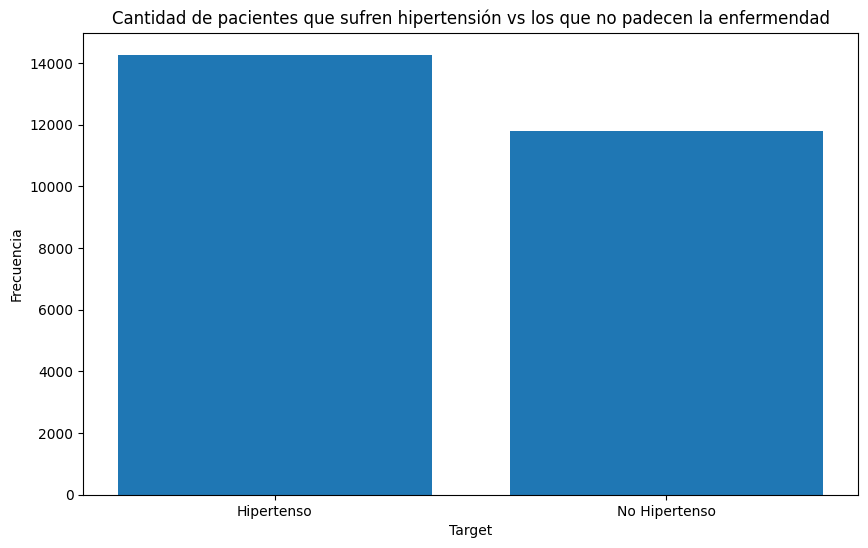

In [56]:
plt.figure(figsize=(10,6))
plt.bar(cant_target.index, cant_target.target)
plt.title("Cantidad de pacientes que sufren hipertensión vs los que no padecen la enfermendad")
plt.ylabel("Frecuencia")
plt.xlabel("Target")
plt.show()

¿Cómo se comporta la variable objetivo respecto al sexo de los pacientes?

Ahora, es de interés analizar la cantidad de personas con hipertensión y sin hipertensión de acuerdo al sexo.

In [57]:
data_crosstab = pd.crosstab(hypertension['sex'],
                            hypertension['target'], 
                               margins = False)
print(data_crosstab)

target     0     1
sex               
0.0     5892  7137
1.0     5892  7137


[Text(0, 0, 'No'), Text(1, 0, 'Sí')]

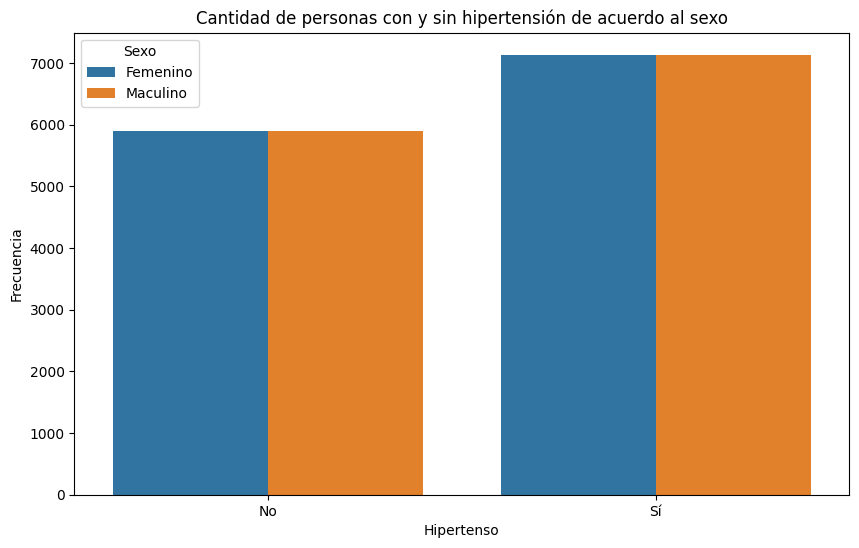

In [58]:
plt.figure(figsize=(10,6))
count_plt = sns.countplot(x='target', data=hypertension, hue = "sex")
count_plt.legend(loc='upper left',title='Sexo', labels = ("Femenino", "Maculino"))
count_plt.set(xlabel='Hipertenso', ylabel='Frecuencia')
plt.title("Cantidad de personas con y sin hipertensión de acuerdo al sexo")
count_plt.set_xticklabels(['No', 'Sí'])

Las salidas anteriores permiten concluir que la cantidad de hombres y mujeres con hipertensión es la misma: 7137 hombres y 7137 mujeres; este comportamiento se repite con las personas que no tienen hipertensión: 5892 hombres y 5892 mujeres.

##### Posibles predictoras.

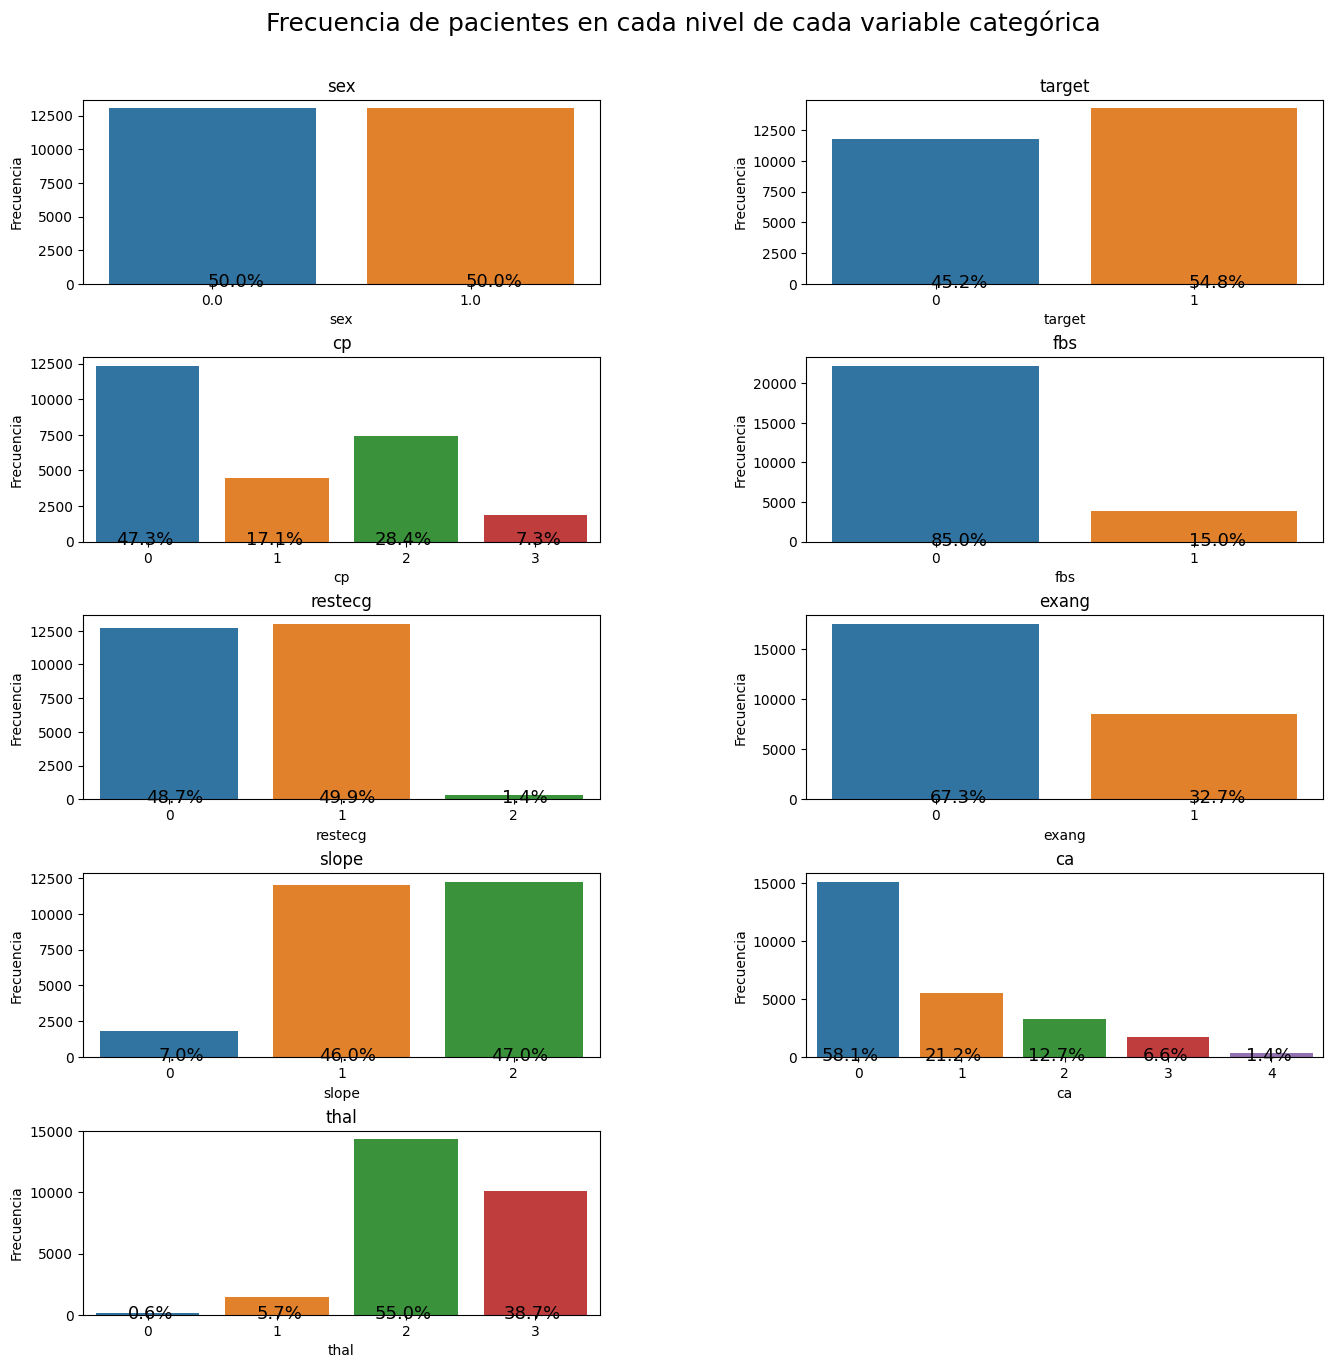

In [112]:
fig = plt.figure(figsize=[16,15])
fig.suptitle('Frecuencia de pacientes en cada nivel de cada variable categórica', fontsize=18)
fig.subplots_adjust(top=0.92); # Parte superior
fig.subplots_adjust(hspace=0.4, wspace=0.4); 
for i , columns in enumerate(colnames_categ): 
    entrada = np.unique(hypertension[columns] , return_counts = True)
    col= 'entrada'
    ax1 = fig.add_subplot(5, 2, i+1); # Posición de la figura
    ax1 = sns.barplot(x=list(eval(f'{col}[0]')), y=list(eval(f'{col}[1]'))) 
    ax1.text(0.2, 120, '{}%' .format(str(round(eval(f'{col}[1][0]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    ax1.text(1.2, 120, '{}%' .format(str(round(eval(f'{col}[1][1]')/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    if len(entrada[1]) == 3:
        ax1.text(2.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[2]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    if len(entrada[1]) == 4:
        ax1.text(2.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[2]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
        ax1.text(3.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[3]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
    if len(entrada[1]) == 5:
        ax1.text(2.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[2]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
        ax1.text(3.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[3]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)
        ax1.text(4.2, 120, '{}%' .format(str(round(list(eval(f'{col}[1]'))[4]/sum(eval(f'{col}[1]'))*100,1))), ha='right', va='center', size=13)



    ax1.set_title(f'{columns}')
    ax1.set_xlabel(f'{columns}')
    ax1.set_ylabel('Frecuencia')

Los anteriores gráficos permiten evidenciar algunas conclusiones:

- El 50 % de los pacientes son hombres y el otro 50 % son mujeres.
- El 58 % de los pacientes sufren hipertensión.
- El 28.7 % de los pacientes padecen angina de pecho atípica y a tan solo el 7.3 % de ellos se le atribuye dolor torácico no anginoso
- En el 15 % de los pacientes se encontró un nivel de gleucemia en ayunas mayor a 120 mg/dl
- Casi la mitad de los pacientes tienen un resultado anormal en electrocardiograma.
- El 32.7 % de los pacientes tienen dolor de pecho inducido por el ejercicio.

#### Continuas.

Ahora, ¿cómo se están comportando las variables continuas?

Para responder a esto, se presenta el siguiente gráfico con la distribución de las variables continuas:

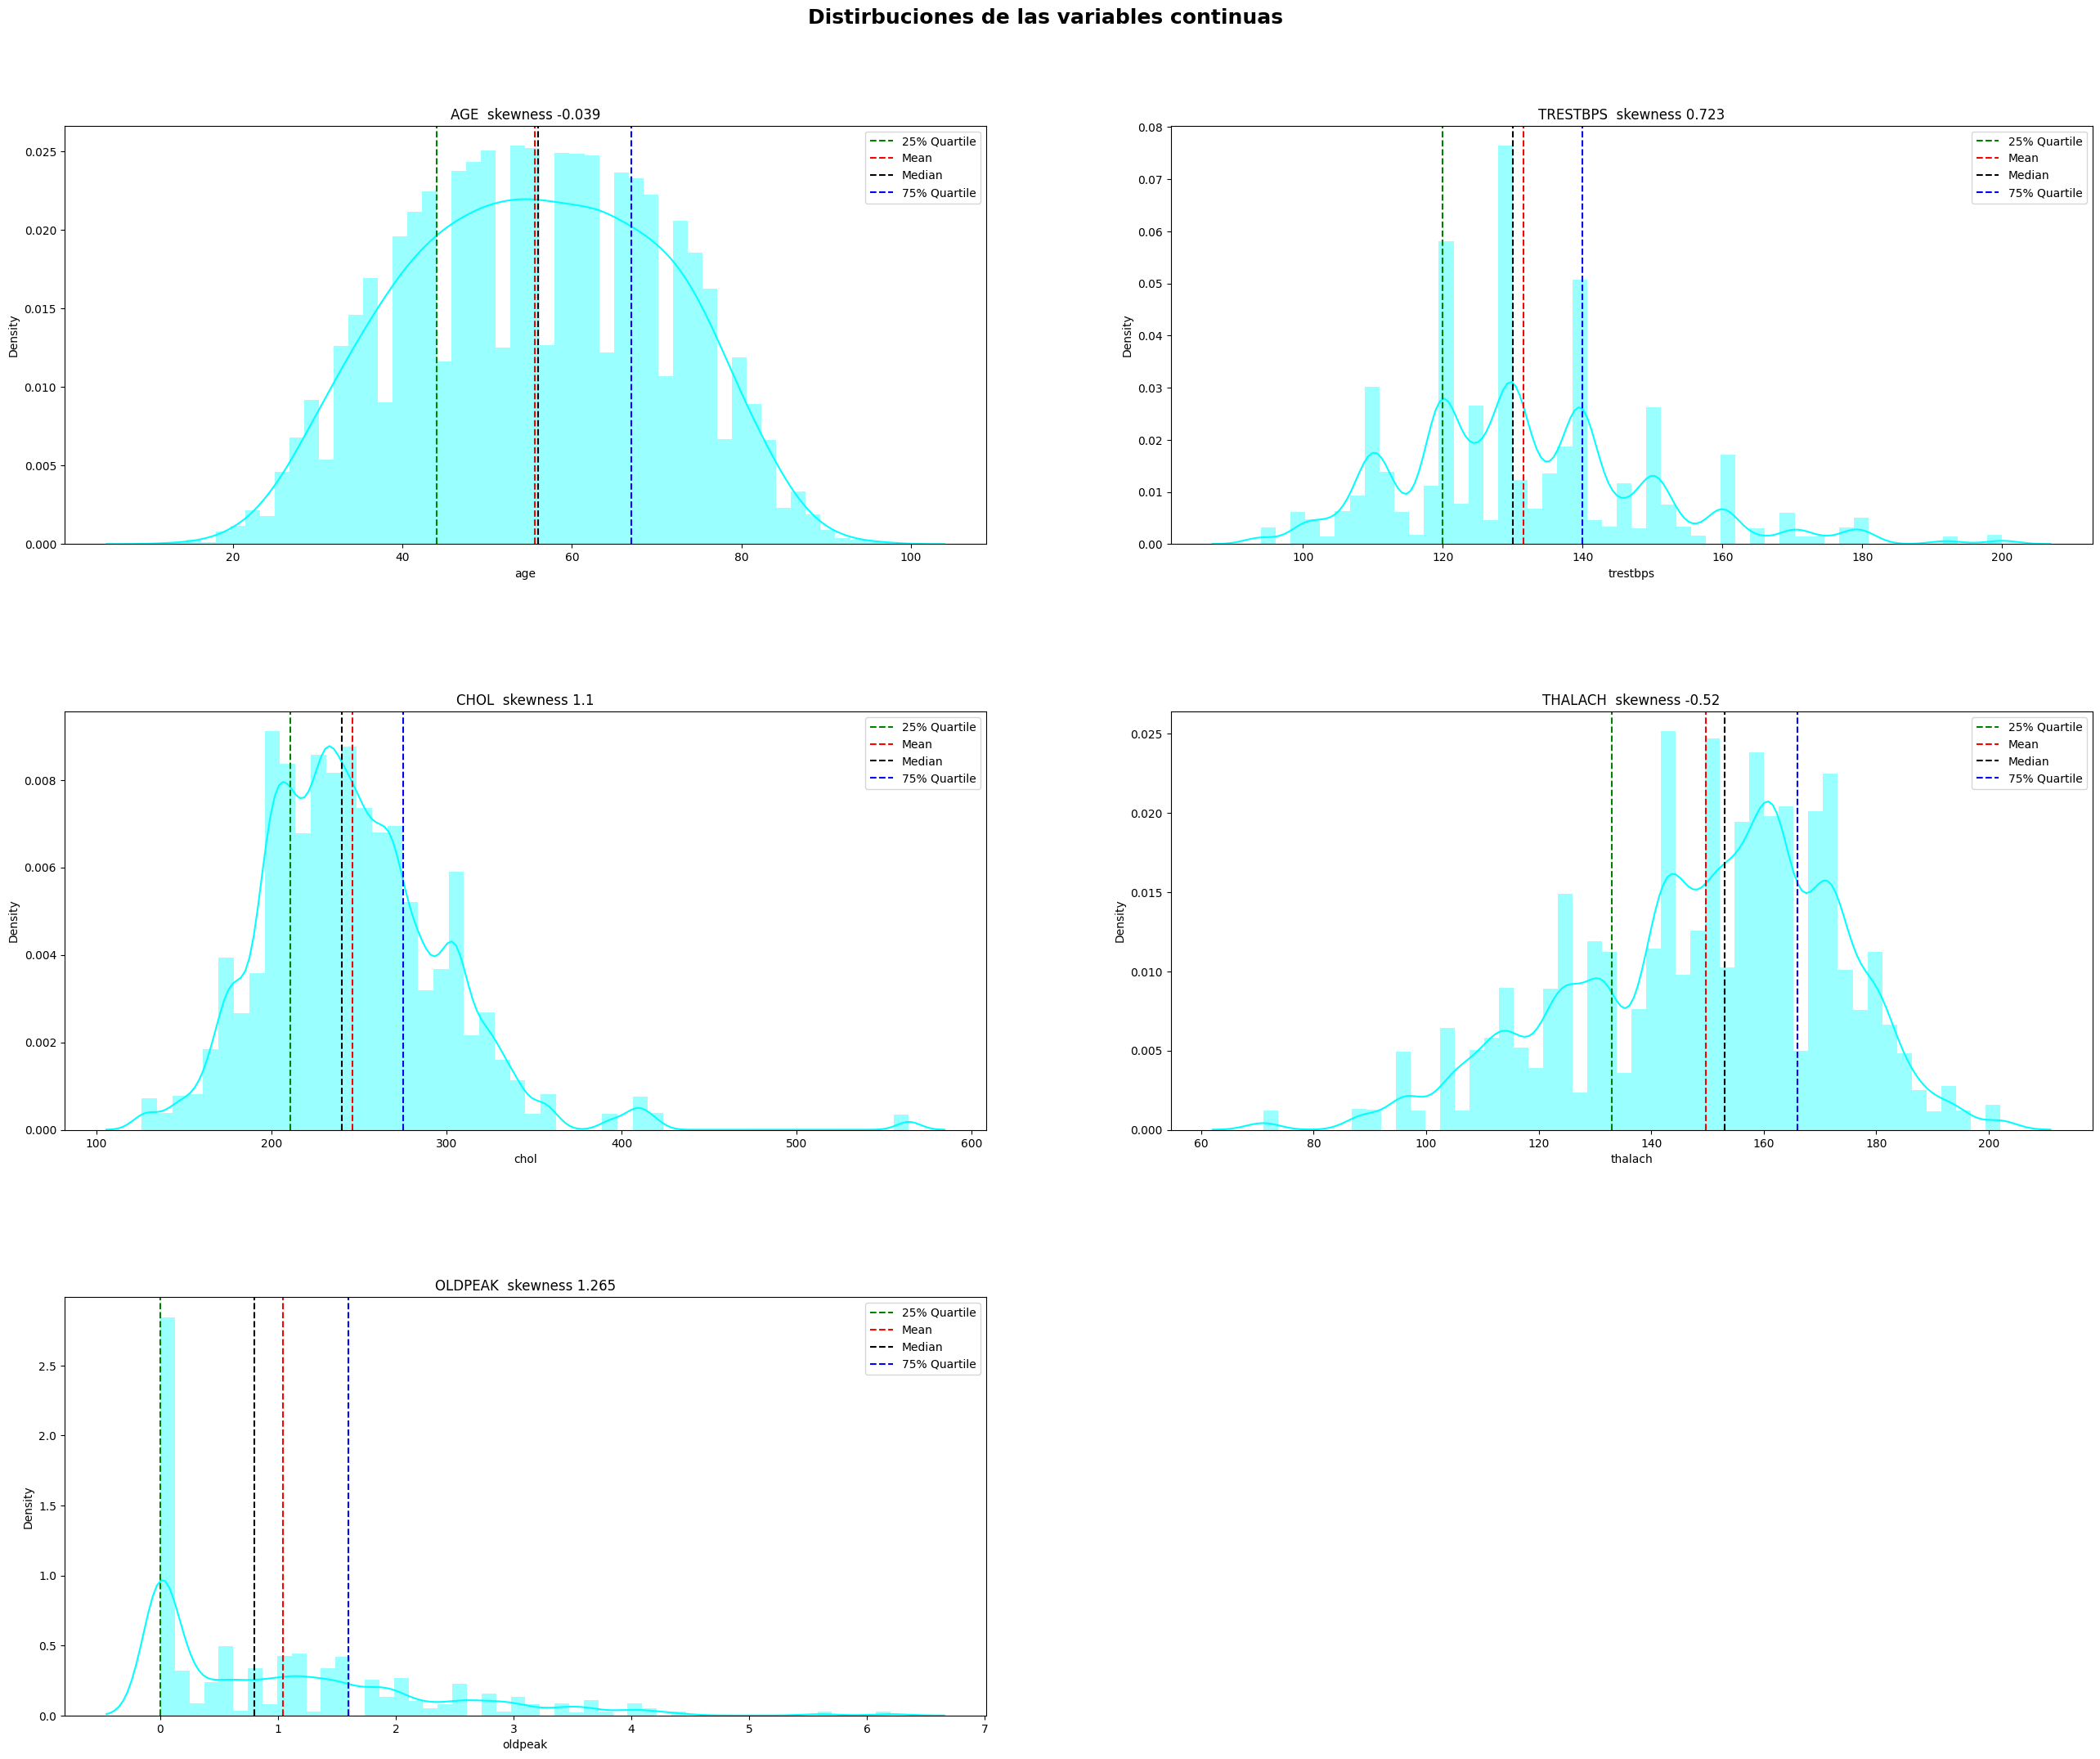

In [119]:
fig = plt.figure(figsize=[32,24])
fig.suptitle('Distirbuciones de las variables continuas', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.4, wspace=0.2);
for i ,col in enumerate(colnames_continuas):
    ax = fig.add_subplot(3,2 , i+1)
    # Distribución:
    ax = sns.distplot(hypertension[col],  color="cyan") 
    # Lineas verticales
    ax.axvline(hypertension[col].quantile(q=0.25),color='green',linestyle='--',label='25% Quartile') # Q1
    ax.axvline(hypertension[col].mean(),color='red',linestyle='--',label='Mean') # Media
    ax.axvline(hypertension[col].median(),color='black',linestyle='--',label='Median') # Mediana
    ax.axvline(hypertension[col].quantile(q=0.75),color='blue',linestyle='--',label='75% Quartile') # Q3
    # ax.text('asimetria: {}' .format(str(round(df[col].skew(),3))), ha='right', va='center', size=11)
    ax.set_xlabel(f'{col}')
    ax.set_title(f'{col.upper()}  skewness {round(hypertension[col].skew(),3)}')
    ax.legend(fontsize=10) 

A excepción de la variable edad (*age*) que presenta un valor de simetría cercano a cero, las variables continuas no parecen ser simétricas y parece haber presencia de valores atípicos, para comprobar esto se puede analizar el gráfico bolxplot de cada una de ellas:


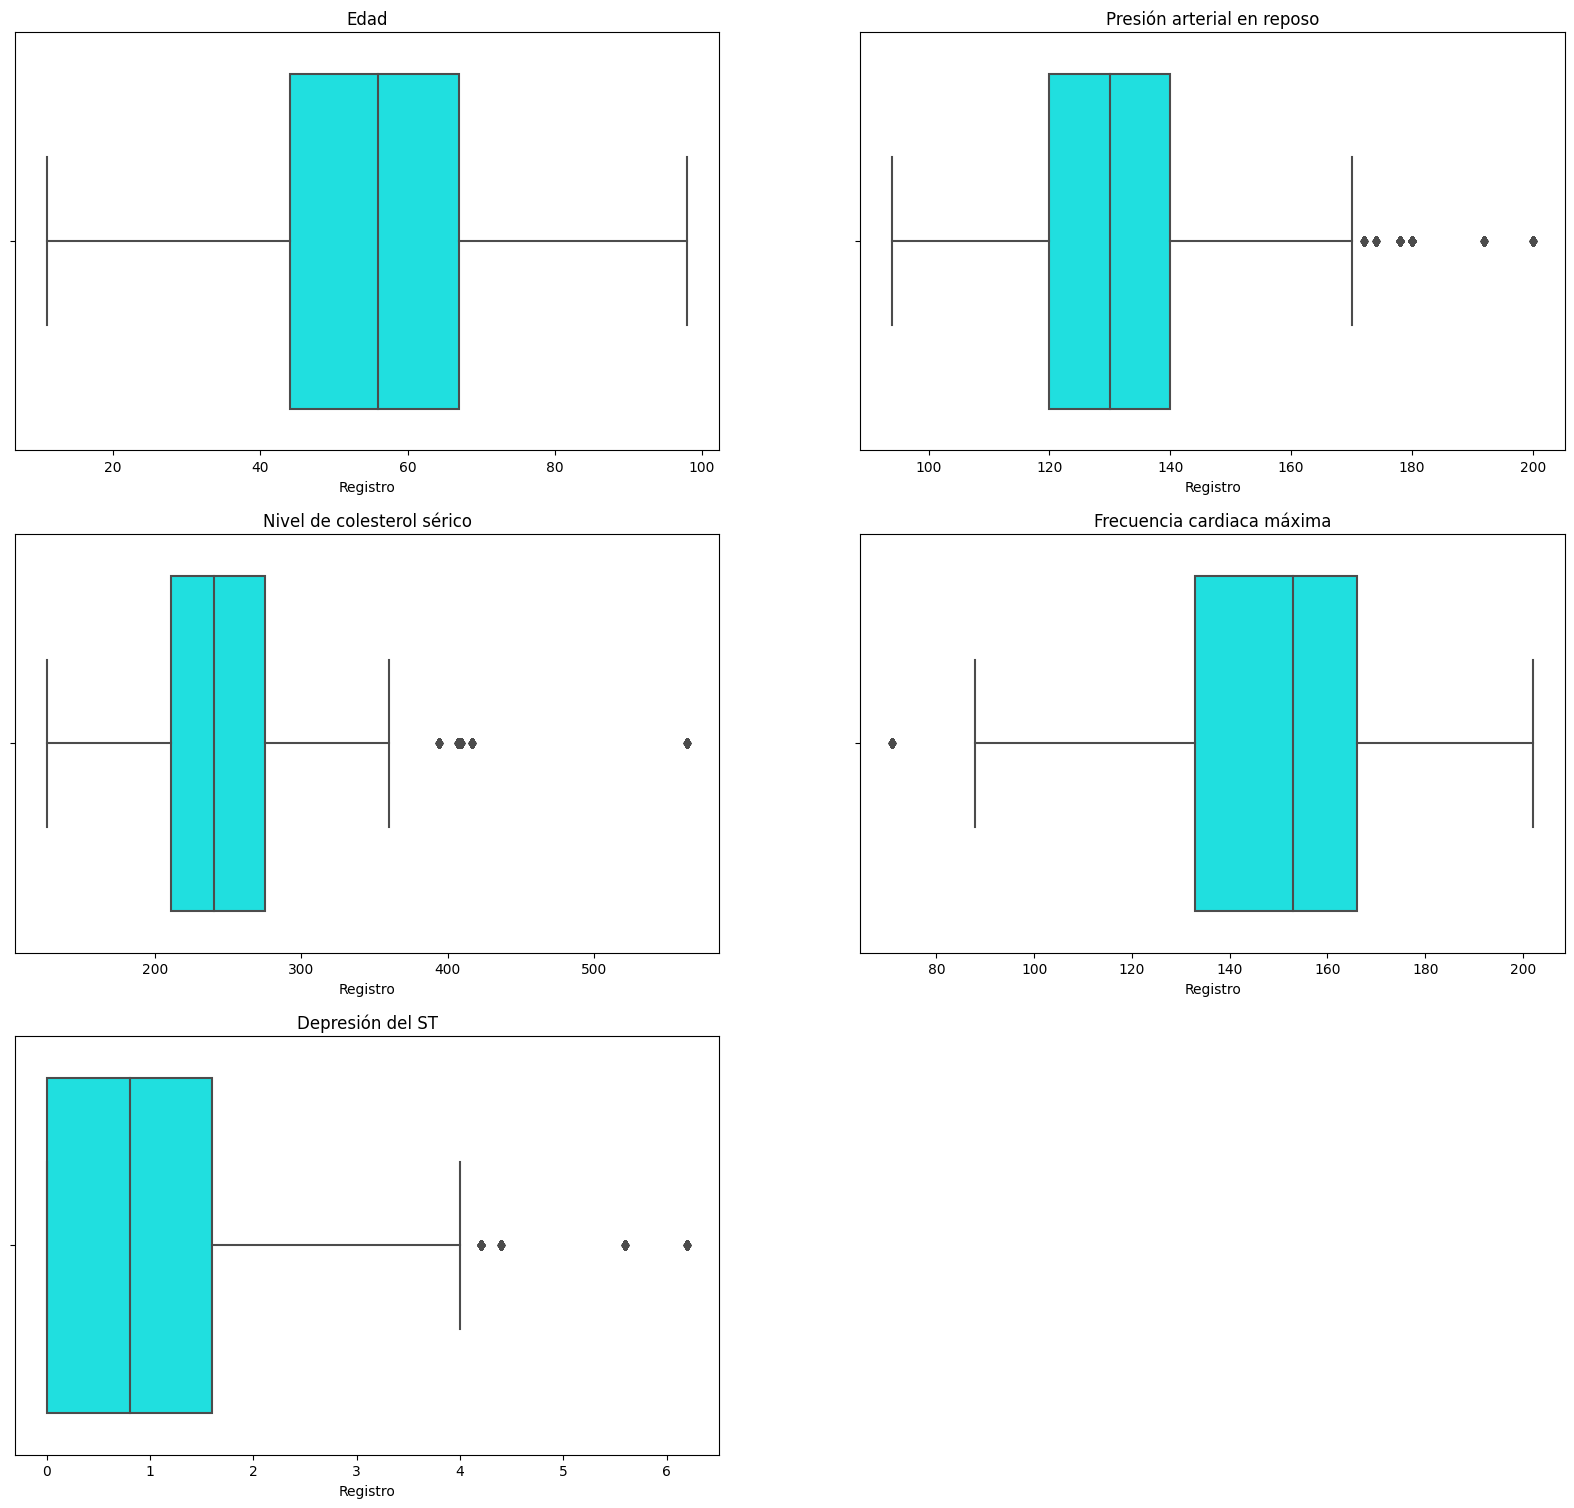

In [120]:
df_boxplot = hypertension[colnames_continuas]
name_boxplot = ["Edad", "Presión arterial en reposo", "Nivel de colesterol sérico", "Frecuencia cardiaca máxima","Depresión del ST"]
plt.figure(figsize=(20,25))
for i,j in zip(range(7),df_boxplot.columns):
  plt.subplot(4,2,i+1)
  sns.boxplot(x=df_boxplot[j],orient='v',color='cyan')
  plt.title(name_boxplot[i])
  plt.xlabel('Registro')

El conjunto de boxplots anterior permite concluir que las variables: presión arterial en reposo, colesterol sérico, frecuencia cardiaca máxima y depresión del ST registran valores atípicos cuyo análisis sería de particular interés.

Por otro lado,las variables colesterol sérico y frecuencia cardiaca máxima son las que mayor dispersión en sus registros presentan.

La variable edad parece tener una distribución bastante simétrica, a diferencia del resto de variables.

### Análisis bivariado.

##### Variables categóricas.

Text(0, 0.5, 'Frecuencia')

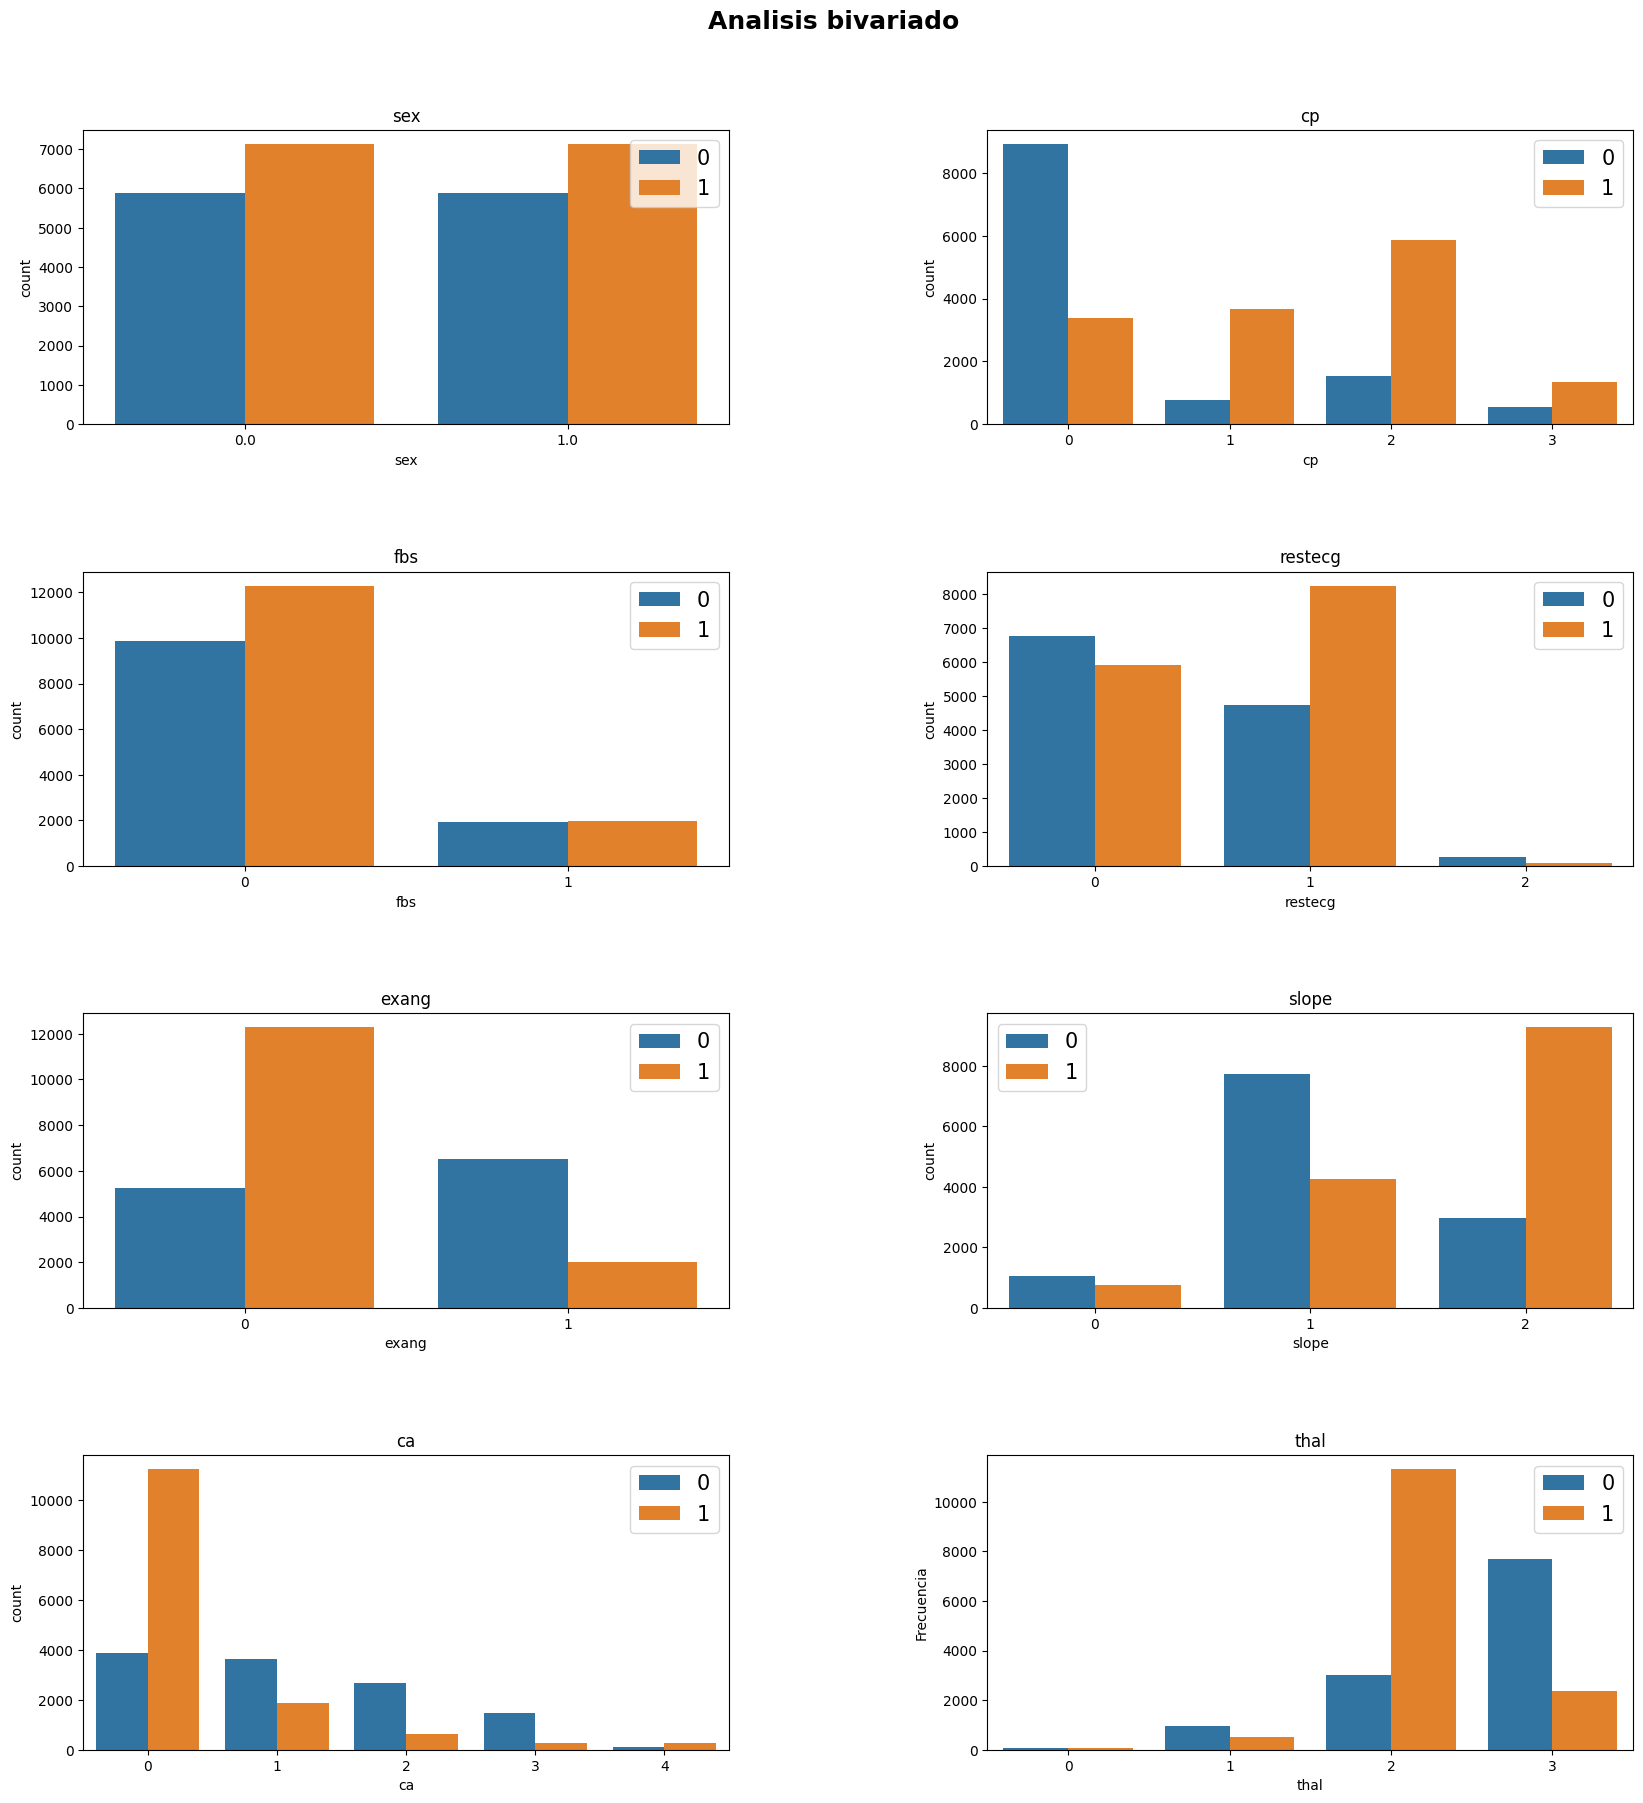

In [127]:
colnames_catego = ["sex","cp","fbs","restecg","exang","slope", "ca", "thal"]
fig = plt.figure(figsize=[20,20])
fig.suptitle('Analisis bivariado', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(colnames_catego):
    a = fig.add_subplot(4, 2, i+1)
    a=sns.countplot(x = hypertension[col] , ax=a , hue = hypertension['target'] )
    a.set_title(col)
    a.legend(fontsize=15)


En la variable tipo de dolor torácico (*cp*), el tipo asintomático es el único nivel de esta variable en la que el número de pacientes que no tiene hipertensión supera a los que sí la tienen, esto puede ser indicio de que el tipo de dolor torácico influye sobre si el paciente tiene o no hipertensión (hipótesis que podrá ser probada más adelante). En cuanto al nivel de gleucemia en ayunas (*fbs*), si la persona presenta un registro mayor a 120 mg/dl, esto no parece influir en el hecho de tener o no hipertensión, pues la cantidad de pacientes con fbs > 120 y con hipertensión es muy similar a los que no tienen hipertensión. 

Por otro lado, si el resultado del electrocardiograma es anormal (variable *resecg*), es más la cantidad de pacientes que padecen hipertensión a las que no, dando posibles indicios de que el estado de este resultado influye en la variable onjetivo, pues si se observa a lo que tienen electrocardiograma normal, la cantidad de pacientes sin hipertensión es mayor a los que la padecen.

Un comportamiento interesante se presenta en la variable de anginia inducida por el ejercicio (*exang*), se observa que la cantidad de pacientes hipertensos es mayor cuando los pacientes no presentan anginia inducida por ejercicio, mientras que cuando no presentan anginia, la cantidad de pacientes no hipertensos es mayor (¿por qué se podría presentar esto?). 

##### Variables continuas